In [1]:
!pip install --upgrade keras-cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.6/721.6 kB 15.1 MB/s eta 0:00:00


In [2]:
# Tested by Sheekar Benerjee, AI Engineering Lead

import time
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


50/50 [==============================] - 118s 2s/step


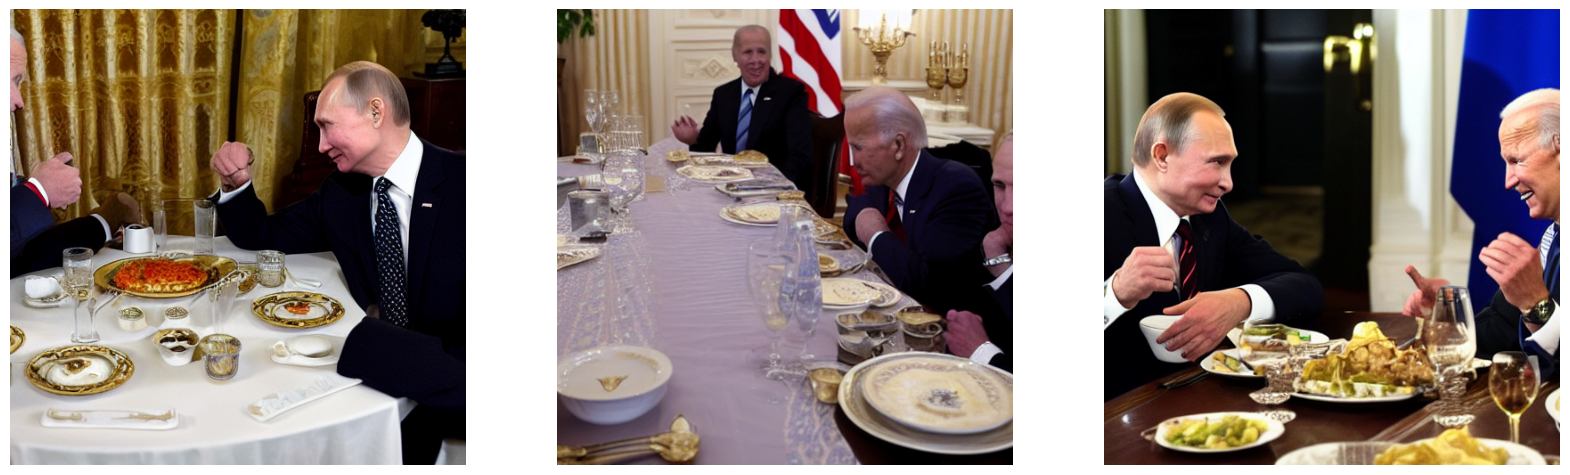

In [5]:
images = model.text_to_image("Vladimir Putin and Joe Biden having dinner at white house", batch_size=3)


def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(images)

50/50 [==============================] - 119s 2s/step


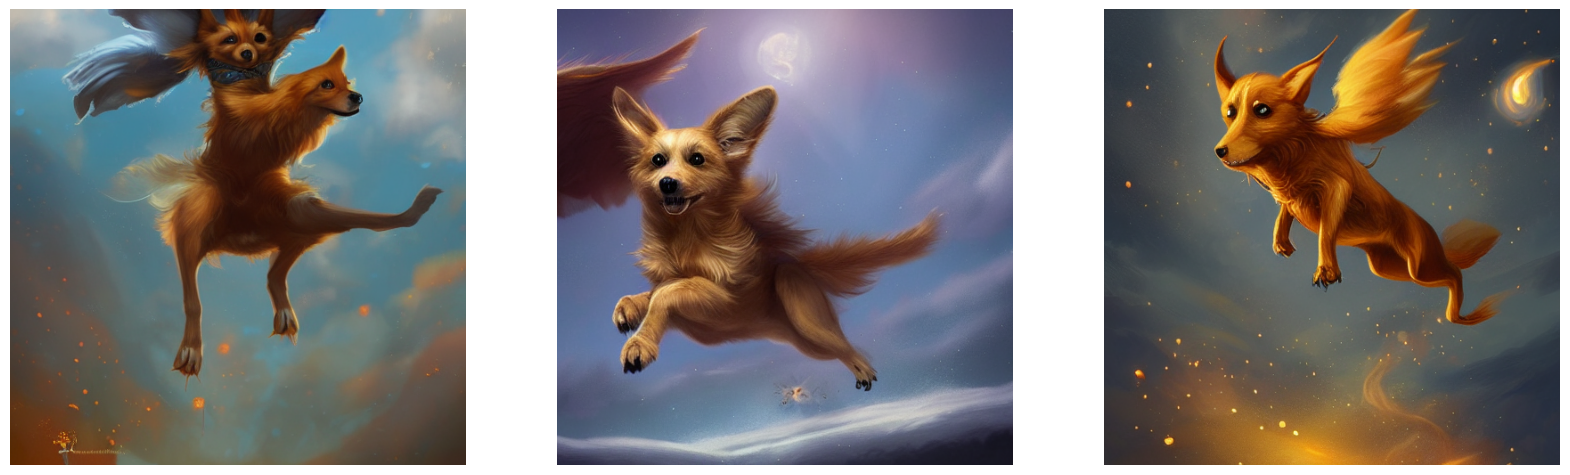

In [6]:
images = model.text_to_image(
    "cute magical flying dog, fantasy art, "
    "golden color, high quality, highly detailed, elegant, sharp focus, "
    "concept art, character concepts, digital painting, mystery, adventure",
    batch_size=3,
)
plot_images(images)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
50/50 [==============================] - 223s 2s/step


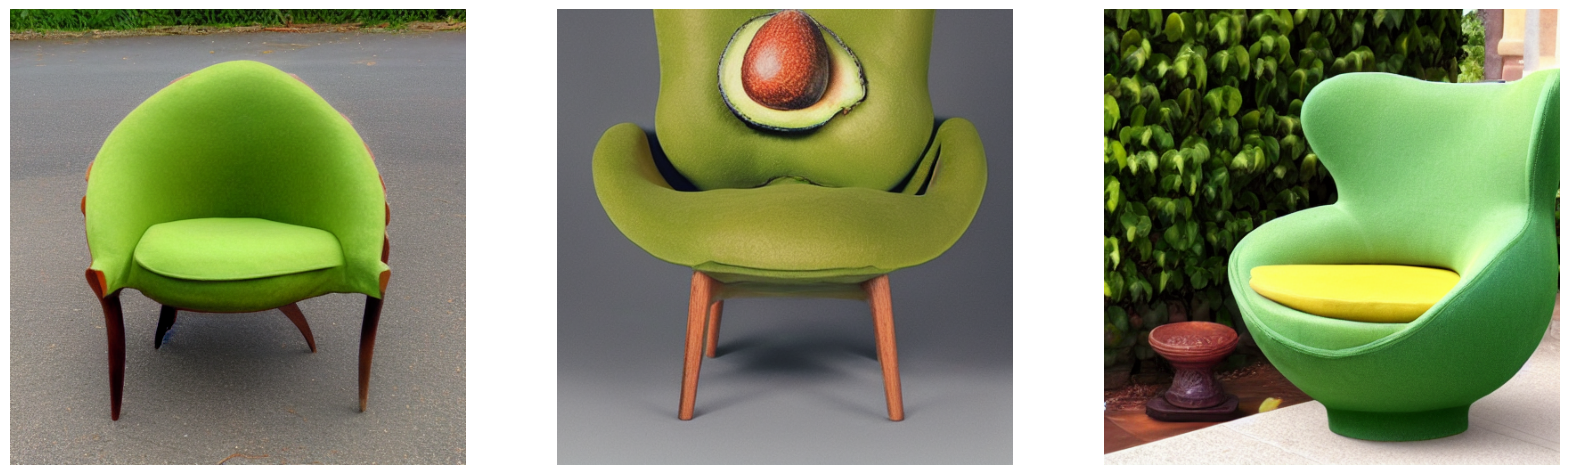

In [7]:
#XLA Compilation
#TensorFlow comes with the XLA: Accelerated Linear Algebra compiler built-in. 
#keras_cv.models.StableDiffusion supports a jit_compile argument out of the box. 
#Setting this argument to True enables XLA compilation, resulting in a significant speed-up.

# Set back to the default for benchmarking purposes.
keras.mixed_precision.set_global_policy("float32")

model = keras_cv.models.StableDiffusion(jit_compile=True)
# Before we benchmark the model, we run inference once to make sure the TensorFlow
# graph has already been traced.
images = model.text_to_image("An avocado armchair", batch_size=3)
plot_images(images)